Some math concepts using python:

limits, derivatives, and integrals


In [1]:
from sympy import *
from sympy.plotting import plot3d

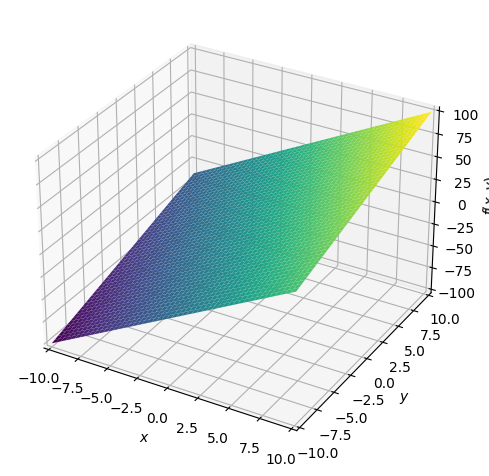

In [3]:
x, y = symbols('x y')
f = 7*x + 3*y 
plot3d(f)

In [26]:
def derivative_x(f, x, step_size):
    m = (f(x + step_size) - f(x)) / ((x + step_size) - x)
    return m

def my_function(x):
    return 2**x

slope_at_2 = derivative_x(my_function, 2, .00001)

print(slope_at_2)

2.772598331350506


In [31]:
from sympy import *

x = symbols('x')

f = 2**x

dx_f = diff(f)
print(dx_f)

2**x*log(2)


In [44]:
def f(x):
    return x**2

def dx_f(x):
    return 2*x

slope_at_2 = dx_f(5.0)

print(slope_at_2)


10.0


Calculating partial derivatives with SymPy

6*x**2
9*y**2


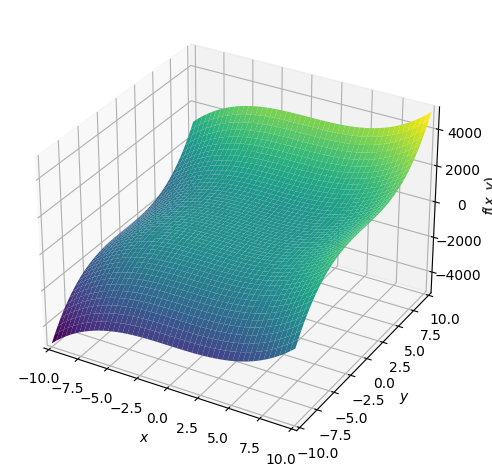

In [46]:
from sympy import*
from sympy.plotting import plot3d

# Declare x and y to SymPy
x,y = symbols('x y')

# Now just use Python syntax to declare function
f = 2*x**3 + 3*y**3

# Calculate the partial derivatives for x and 
dx_f = diff(f, x)
dy_f = diff(f, y)

print(dx_f)
print(dy_f)

# plot the function
plot3d(f)

Using limits to calculate a slope


In [50]:
from sympy import *

# "x" and step size "s"
x, s = symbols('x s')

f = x**2

# slope between two points with gap "s"
# substitute into rise-over-run formula
slope_f = (f.subs(x, x + s) - f) / ((x+s) - x)

#substitute 2 for x
slope_2 = slope_f.subs(x, 2)

#calculate slope at x = 2
#infinitely approach step size _s_ to 0

result = limit(slope_2, s, 0)

print(result)

4


The code shared calculates the slope of the function f(x) = x^2 at the point x = 2. It utilizes the concept of a limit to determine the instantaneous slope, or the slope at an exact point.

The general formula for slope calculation is:

slope = (f(x + s) - f(x)) / s

In this code, we first define the function f(x) = x^2. Then, we calculate the slope using the "rise-over-run" formula with the substitution f.subs(x, x + s) to obtain the difference in the function between the points x and x + s, and ((x+s) - x) to obtain the value of s, which is the step or interval between those points.

Next, we use f.subs(x, 2) to substitute x with 2 in the slope, thus obtaining the slope at the point x = 2.

We then use the concept of a limit with the limit() function to evaluate the behavior of the slope as the step size s approaches zero. In this case, we are calculating the limit of the slope at the point x = 2 as the step size s tends to zero.

The final result is stored in the variable "result" and represents the instantaneous slope of the function f(x) = x^2 at the point x = 2.

In summary, this code calculates the derivative of the function f(x) = x^2 at the point x = 2 using the concept of a limit, determining the instantaneous slope at that point.

Using limits to calculate a derivative


In [51]:
from sympy import *

# "x" and step size "s"
x, s = symbols('x s')

#declare a function
f = x**2

#slope between two points with gap "s"
#substitute into rise-over-run formula
slope_f = (f.subs(x, x + s) - f) / ((x+s) - x)

#calculate derivative function
#infinitely approach step size +s+ to 0

result = limit(slope_f, s, 0)

print(result)

2*x


That gave us our derivative function 2x. SymPy was smart enough to
figure out to never let our step size reach 0 but forever approach 0. This
converges f (x) = x2 to reach its derivative counterpart 2x

The Chain Rule

When we build a neural network, we are going to need a
special math trick called the chain rule. When we compose the neural
network layers, we will have to untangle the derivatives from each layer.
But for now let’s learn the chain rule with a simple algebraic example. Let’s
say you are given two functions

y = x2 + 1

z = y3 − 2

Notice that these two functions are linked, because the y is the output
variable in the first function but is the input variable in the second. This
means we can substitute the first function y into the second function z like
this

z = (x2 + 1)3 − 2

So what is the derivative for z with respect to x? We already have the
substitution expressing z in terms of x. Let’s use SymPy to calculate that in

In [52]:
from sympy import *

z = (x**2 + 1)**3 -2
dz_dx = diff(z, x)
print(dz_dx)

# 6*x*(x**2 + 1)**2

6*x*(x**2 + 1)**2


So our derivative for z with respect to x is 

6x(x2 + 1)2:

dz / dx ((x2 + 1)3 − 2)

= 6x(x2 + 1)2



Calculating the derivative dz/dx with and without the chain
rule, but still getting the same answer

In [53]:
# derivative for first function
# need to underscore y to prevent variable clash

_y = x**2 + 1
dy_dx = diff(_y)

# derivative for second function

z = y**3 - 2
dz_dy = diff(z)

# Calculate derivative with and without chain rule, substitute y funtion

dz_dx_chain = (dy_dx * dz_dy).subs(y, _y)
dz_dx_no_chain = diff(z.subs(y, _y))

# Prove chain rue by showing both are equal

print(dz_dx_chain)
print(dz_dx_no_chain)

6*x*(x**2 + 1)**2
6*x*(x**2 + 1)**2


The chain rule is a key part of training a neural network with the proper
weights and biases. Rather than untangle the derivative of each node in a
nested onion fashion, we can multiply the derivatives across each node
instead, which is mathematically a lot easier.